# Analysis Titanic data

This is an analysis work done on the Titanic data downloaded from Kaggle. We will focus mostly on analysing variables and finding some interesting questions to answer. Few statistical models will be used, the analysis will be mostly done using different kinds of graphs and grouping together variables. 

1. Let's have a look at the data...

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('Titanic.csv')

print(dataset.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Possible questions that we might be interesting to answer fot this data:
- general information about passangers (how many male/female, how many people for each class, average-max-min age, how much each class paid the ticket)
- information about who died/survived (how many for each class, male/female, average age, cabin?)
- analysis of what influenced the most the fact of living/dying

## Data cleaning

In [2]:
#check if in any column there are some NA
print(dataset.isnull().any())


#change NA in age with the mean
mean_age = dataset['Age'].mean()
dataset['Age'].fillna(mean_age, inplace=True)

print('\n')
print('Check value counts for embarked column')
print(dataset['Embarked'].value_counts(dropna= False, ascending =False))

#assign Na in embarked to the most common value
dataset['Embarked'].fillna('S', inplace=True)

#check that now everything is as expected - just na in cabin
print('\n')
print(dataset.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


Check value counts for embarked column
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool


Here we have noticed that 3 columns have NA values: age, cabin and embarked. For just the column cabin makes sense to have some NA, because the majority of  passengers did not have a cabin.
For the column Age we have changed NA values considering the mean of this column. This will surely give some modification in our analysis.
For embarked just 2 values were set to NA: we decided to put them to the most common value for this column 'S'.


In [3]:
#create some helper functions
def aggregate_data(dataset, var1, var2, aggregation):
    return dataset.groupby(var1).agg({var2:aggregation})

def aggregate_multiple_data(dataset, var1, var2, var3, aggregation):
    return dataset.groupby([var1, var2]).agg({var3:aggregation})


## General information about the passengers

### Number of passengers 

The total number of passenger was 891


        PassengerId
Sex                
female          314
male            577


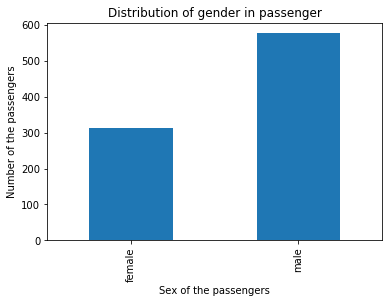

In [4]:
tot_pass = dataset['PassengerId'].count()
print('The total number of passenger was {}'.format(tot_pass))
print('\n')

male_female = aggregate_data(dataset, 'Sex', 'PassengerId', 'count')
print(male_female)

%matplotlib inline
ax = male_female.plot(kind='bar')
ax.set_xlabel('Sex of the passengers')
ax.set_ylabel('Number of the passengers')
ax.set_title('Distribution of gender in passenger')
ax.legend_.remove()

This first analysis shows the total number of passengers, 891, and the distribution of male vs female. From the histogram above, we can definitely see a much higher number of men than women.

### Passengers for each class

Percentage of passengers for each class
           Pclass
Pclass           
1       10.500729
2       17.890131
3       71.609140


Percentage of male and female of passengers for each class
               PassengerId
Pclass Sex                
1      female    44.236498
       male      55.763502
2      female    41.040265
       male      58.959735
3      female    26.694957
       male      73.305043




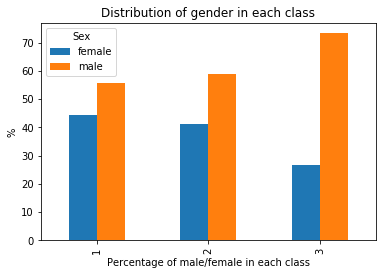

In [5]:
print('Percentage of passengers for each class')
pclass = aggregate_data(dataset, 'Pclass', 'Pclass', 'sum')
pclass_percentage = pclass.apply(lambda x:100 * x / float(x.sum()))
print(pclass_percentage)
print('\n')

print('Percentage of male and female of passengers for each class')
pclass_sex_grouped = aggregate_multiple_data(dataset, 'Pclass', 'Sex', 'PassengerId', 'sum')
pclass_sex = pclass_sex_grouped.groupby(level=0).apply(lambda x:
                                                       100 * x / float(x.sum()))
print(pclass_sex)
print('\n')

%matplotlib inline

ax = pclass_sex.unstack()['PassengerId'].plot(kind='bar')
ax.set_xlabel('Percentage of male/female in each class')
ax.set_ylabel('%')
ax.set_title('Distribution of gender in each class')


Here we have analysed a bit more in details the distribution of class and gender. It's clear that the majority of the passengers were in the 3rd class, the cheapest, and a few were distributed between 1st and 2nd. 
Then, we have also analysed the gender distribution: in each class we have a clear majority of males, which is more important in the 3rd class. 

### Average age 

Minimum age 0.42
Maximum age 80.0
Mean age 29.699117647058763


Average age for class
                     Age
Pclass Sex              
1      female  34.141405
       male    39.287717
2      female  28.748661
       male    30.653908
3      female  24.068493
       male    27.372153


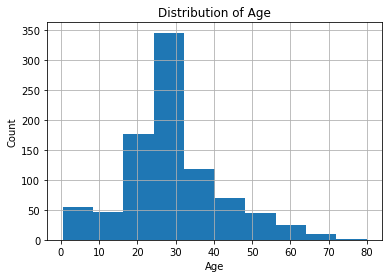

In [6]:
%matplotlib inline
ax =dataset['Age'].hist()
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Distribution of Age')

age = dataset['Age']

age_min = age.min()
age_max = age.max()
age_mean = age.mean()

print('Minimum age {}'.format(age_min))
print('Maximum age {}'.format(age_max))
print('Mean age {}'.format(age_mean))
print('\n')

print('Average age for class')
pclass_age_grouped = aggregate_multiple_data(dataset, 'Pclass', 'Sex', 'Age','mean')
print(pclass_age_grouped)


Few analysis on age: as we can clearly see from the distribution, age follows has right skewed distribution. Most probably this is due to the fact that we substituded null values with the mean.
The average mean of passengers is almost 30y and considering that the majority of people were emigrating to US to find a better fortune, this definitely makes sense. 

### Fare analysis

Minimum fare 0.0
Maximum fare 512.3292
Mean fare 32.2042079685746


Average fare for class
             Fare
Pclass           
1       84.154687
2       20.662183
3       13.675550


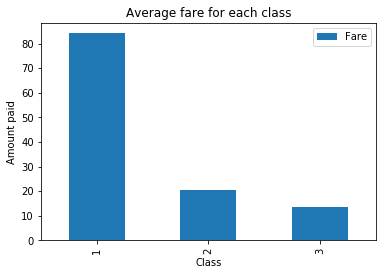

In [7]:
fare = dataset['Fare']

fare_min = fare.min()
fare_max = fare.max()
fare_mean = fare.mean()

print('Minimum fare {}'.format(fare_min))
print('Maximum fare {}'.format(fare_max))
print('Mean fare {}'.format(fare_mean))
print('\n')

print('Average fare for class')

pclass_fare_grouped = aggregate_data(dataset, 'Pclass', 'Fare', 'mean')
print(pclass_fare_grouped)
%matplotlib inline
ax = pclass_fare_grouped.plot(kind='bar')
ax.set_xlabel('Class')
ax.set_ylabel('Amount paid')
ax.set_title('Average fare for each class')


As we could imagine, the highest average fare is paid by the passengers who are travelling in 1st class. Surprisingly there is not a massive difference between the average cost for a ticket of 2nd and 3rd class. 

### Cabin analysis

In [8]:
cabin = dataset['Cabin']

print('Number of cabin for each class')

pclass_cabin_grouped = aggregate_data(dataset, 'Pclass', 'Cabin', 'count')
print(pclass_cabin_grouped)

Number of cabin for each class
        Cabin
Pclass       
1         176
2          16
3          12


Just a few amount of cabin were given, mostly to 1st class. Having a cabin definitely costed more money and few people could afford that. 

## Information about who died/survived

The number of survivors is 342 out of 891, which represent 38.38383838383838% of total


Percentage of survivor/died for each sex
                  Survived
Sex    Survived           
female 0         25.796178
       1         74.203822
male   0         81.109185
       1         18.890815


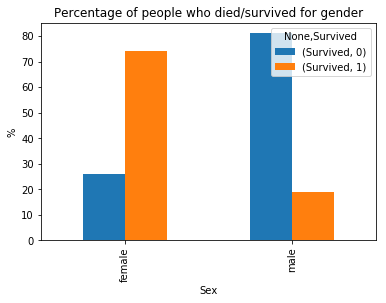

In [9]:
survivors = sum(dataset['Survived'])
print('The number of survivors is {} out of {}, which represent {}% of total'.format(survivors, tot_pass, survivors/tot_pass*100))

print('\n')
print('Percentage of survivor/died for each sex')
male_female_survived_group = aggregate_multiple_data(dataset, 'Sex', 'Survived', 'Survived','count')
male_female_survived = male_female_survived_group.groupby(level=0).apply(lambda x:
                                                       100 * x / float(x.sum()))

print(male_female_survived)
%matplotlib inline
ax = male_female_survived.unstack().plot(kind='bar')
ax.set_xlabel('Sex')
ax.set_ylabel('%')
ax.set_title('Percentage of people who died/survived for gender')

In this tragic event, just 38% of passengers survived which is not a lot considering the long time the ship took to completely sink. 
The majority of those survivors were female: as we can clearly see from the graph more than 70% of female survived, against just 20% of men.

Average age of survivors
Survived      
0         mean    30.415100
          std     12.457370
1         mean    28.549778
          std     13.772498
Name: Age, dtype: float64


[<matplotlib.text.Text at 0x116f745c0>, <matplotlib.text.Text at 0x116f52668>]

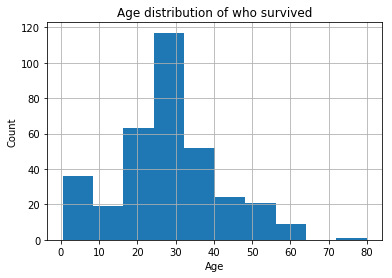

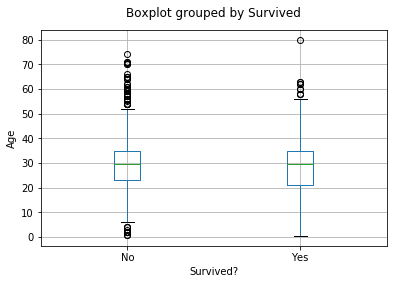

In [10]:
print('Average age of survivors')

avg_age= dataset.groupby('Survived')['Age'].describe().loc[:, ['mean', 'std']]
print(avg_age)
ax1 = dataset['Age'].where(dataset['Survived']==1).hist()
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.set_title('Age distribution of who survived')


ax2 = dataset.boxplot(column = 'Age', by='Survived')
ax2.set_ylabel('Age')
ax2.set_xlabel('Survived?')
ax2.set_title('')
ax2.set_xticklabels(['No', 'Yes'])

Let's consider now some metrics regarding the age of who died/survived: if we focus on survivors, their age is slightly lower than people who died. 
As we can see from the above boxplot, there is a little difference in age between survivors and not. On the other side we can see some outliers for older people as well as a longer lower tail.  
Most probably kids were saved together with theirs mum as first.

In [11]:
print('What is the percentage of people who survived in each class?')
pclass_survived_grouped = aggregate_multiple_data(dataset, 'Pclass','Survived', 'PassengerId', 'count')
pclass_survived = pclass_survived_grouped.groupby(level=0).apply(lambda x:
                                                       100 * x / float(x.sum()))

print(pclass_survived)
print('\n')

What is the percentage of people who survived in each class?
                 PassengerId
Pclass Survived             
1      0           37.037037
       1           62.962963
2      0           52.717391
       1           47.282609
3      0           75.763747
       1           24.236253




Interesting to notice that 62% of people in 1st class survived against just 24% in 3rd class.. surely this is not random.

In [12]:
print('How many people did not have a cabin? {}'.format(sum(dataset['Cabin'].isnull())))

cabin_survived_grouped = aggregate_data(dataset, 'Survived','Cabin', 'count')
print(cabin_survived_grouped)
print('\n')


How many people did not have a cabin? 687
          Cabin
Survived       
0            68
1           136




### What influenced the most the fact of surviving or dying?

In [13]:
#let's do some correlation analysis on the variables using Pearsons
from pydoc import help
from scipy.stats.stats import pearsonr, chisquare

#let's transform sex to numerical
sex =  dataset['Sex'].map({'male': 0, 'female': 1})

#let's calculate correlations
corr_class= pearsonr(dataset['Survived'], dataset['Pclass'])
corr_sex = pearsonr(dataset['Survived'], sex)
corr_parch = pearsonr(dataset['Survived'], dataset['Parch'])

print('The correlation between who survived and his/her class is {}'
      .format(corr_class[0]))
print('The correlation between who survived and his/her sex is {}'
      .format(corr_sex[0]))
print('The correlation between who survived and his/her parch is {}'
      .format(corr_parch[0]))

# Now let's perform a chi-square test 
test_gender = chisquare(male_female_survived_group)
test_class = chisquare(pclass_survived_grouped)

print('\n')
print('The Chi square value for gender compared to Survived is {} and the p-value is {}'
      .format(test_gender[0], test_gender[1]))
print('The Chi square value for class compared to Survived is {} and the p-value is {}'
      .format(test_class[0], test_class[1]))

The correlation between who survived and his/her class is -0.33848103596101536
The correlation between who survived and his/her sex is 0.5433513806577552
The correlation between who survived and his/her parch is 0.08162940708348349


The Chi square value for gender compared to Survived is [ 418.78675645] and the p-value is [  1.88617143e-90]
The Chi square value for class compared to Survived is [ 418.21885522] and the p-value is [  3.50723825e-88]


As we can notice from the analysis done in the first part of this report, the big majority of survivors were women. Also the class played an important role, having more people saved between 1st and 2nd class compared to 3rd.
Having a look at the correlation measure between survived and class, we can see that those two variables are negative correlated. Survived and sex have even a stronger correlation. 
Considering another variable, like survived and parch we see that they are not correlated.
Correlation is the measure of the strength of a linear relationship, it does not imply causation.

Then we have done two separate chi-squared test to further verify our conviction: 
- Null hypothesis: sex and survival are independent VS
-Alternative hypothesis - women more likely to survive.

Considering such a low p value we can accept the alternative hypothesis.

For the second chi-squared test, we considered:
- Null hypothesis: class and survival are independent VS
-Alternative hypothesis - women more likely to survive.

As well in this case, considering the low p value, we can accept the alternative hypothesis.

We can conclude that in this event 'the women and kids first' rule was applied and as well the class was considered. 

# Conclusion

Our analysis on the data showed that the Titanic was transporting 891 passengers, with a majority of male vs female. The biggest part of them, 70%, was traveling 3rd class, then 17% was in 2nd class and just 10% in 1st. 

Regarding the tragic event and who survived, we can definitely say that first women and kids were saved: 75% of female survived agaist just 20% of male. This hypothesis is also confirmed by the statistical test we run. 
At the same time, a higher number of passengers in 1st class survived (65% vs just 25% in 3rd class). Also for this variable a statistical test confirmed this hypothesis.

Regarding the dataset we can say it is a bit limited, considering its size as well as missing data. This could skew the results for example in missing ages. For this issue I have chosen to consider the average age, creating a skewed distribution.

At the same time, some other variables were not considered at all, like:
-information about the crew
-number of lifeboat available.

Even if not all aspects of this tragic event were taken into consider, we can consider the analysis done quite complete. 
